In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("data2/jobs2.csv")
df.shape

(7900, 15)

In [3]:
# df = pd.read_csv("data2/jobs2.csv")
# df = df.loc[(df["keyword"] != "Künstliche_Intelligenz") & (df["keyword"] != "Artificial_Intelligence")]
# df.drop("keyword", axis=1, inplace=True)
# df.drop_duplicates(inplace=True)
# df.shape

In [4]:
df = pd.read_csv("data2/jobs2.csv")
df.drop("keyword", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(3761, 14)

In [5]:
df.head()

,link,company,title,location,contract_type,work_type,content,industry,rating,num_ratings,company_link,release_date,salary,company_size
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,NaN,2501-5000
6,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Berlin,Feste Anstellung,"Vollzeit, Home Office möglich",Direkter geht Karriere nicht.Einstieg bei der ...,NaN,4.3,16 Bewertungen,NaN,2022-06-03,51.000 - 68.000 €,NaN
11,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,"Dortmund, Düsseldorf, Aachen",Feste Anstellung,"Vollzeit, Home Office möglich",Direkter geht Karriere nicht.Einstieg bei der ...,NaN,4.3,16 Bewertungen,NaN,2022-06-03,51.000 - 74.000 €,NaN
16,https://www.stepstone.de/stellenangebote--Data...,METRO Markets GmbH,Data Science Lead,"Düsseldorf, Palma de Mallorca",Feste Anstellung,"Vollzeit, Home Office möglich",We create the future of B2B commerce by giving...,IT & Internet,NaN,NaN,NaN,2022-06-01,74.000 - 98.000 €,NaN
21,https://www.stepstone.de/stellenangebote--Werk...,CHECK24,Werkstudent BI und Data Science Manager (m/w/d...,München,"Studentenjobs, Werkstudent",Teilzeit,"Bist Du bereit, etwas zu bewegen und neue, spa...",Finanzdienstleister|Versicherungen,4.5,179 Bewertungen,https://www.stepstone.de/cmp/de/CHECK24-112642...,2022-06-01,NaN,2501-5000


In [6]:
df.isnull().sum()

link                0
company             0
title               0
location            0
contract_type      18
work_type          16
content             0
industry          637
rating           1137
num_ratings      1137
company_link      751
release_date        0
salary           1643
company_size      974
dtype: int64

# Evaluate Job Title

In [7]:
df["title"].value_counts()

Data Engineer (m/w/d)                                      22
Data Scientist (m/w/d)                                     19
Data Analyst (m/w/d)                                       17
Data Engineer (w/m/d)                                       9
DevOps Engineer (m/w/d)                                     7
                                                           ..
Automation Workflow Developer - Electron Microscopy         1
Senior Data Engineer - Central DWH, Global Data (f/m/d)     1
Junior Python Developer (m/f/d)                             1
Actuarial Data Scientist (m/w/d)                            1
Senior Analyst im Bereich Economic Intelligence (w/m/d)     1
Name: title, Length: 3508, dtype: int64

In [8]:
# es existieren sehr viele unterschiedliche Jobtitel ==> für weitere Analysen müssen diese zu Gruppen zusammengefasst werden

In [9]:
title_text = " | ".join(df["title"])
title_text[:100]

'Analyst Data Science & Artificial Intelligence (m/w/d) | Manager (m/w/d) Data Science & Statistik | '

In [10]:
stop_eng = set(stopwords.words('english'))
stop_ger = set(stopwords.words('german'))
stop_all = stop_eng.union(stop_ger)
len(stop_all)

405

In [11]:
# CountVectorizer erwatet eigentlich mehrere Beispiele
l = []
l.append(title_text)

vectorizer = CountVectorizer(ngram_range=(2,3))
vector = vectorizer.fit_transform(l)
results = pd.DataFrame({"keyword": vectorizer.get_feature_names_out(), "count": vector.toarray().reshape(-1)})
results = results.loc[~results["keyword"].isin(stop_eng.union(stop_ger))]
results.sort_values("count", ascending=False).head(50)

,keyword,count
6042,data engineer,284
5787,data analyst,220
6393,data scientist,203
21854,senior consultant,151
21919,senior data,150
12227,im bereich,150
9009,engineer data,108
6336,data science,98
15426,machine learning,93
5900,data analytics,88


In [12]:
def convert_title(x):
    x["title_cat"] = "Others"
    x.loc[x["title"].str.contains("Software|Developer|Entwickler", case=False, regex=True), "title_cat"] = "Software Engineer"
    x.loc[x["title"].str.contains("Analyst|Business[- ]*Intelligence|Analytics", case=False), "title_cat"] = "Data Analyst"
    x.loc[x["title"].str.contains("Data[- ]*Scientist|Data[- ]*Science|Research[- ]*Scientist|Research[- ]*Engineer", case=False), "title_cat"] = "Data Scientist"
    x.loc[x["title"].str.contains("Data[- ]*Engineer|Data[- ]*Architekt|Data[- ]*Architect", case=False, regex=True), "title_cat"] = "Data Engineer"
    x.loc[x["title"].str.contains("Machine[- ]*Learning|Deep[- ]*Learning|AI|KI|ML|DL|Artificial[- ]*Intelligence|Künstliche[- ]*Intelligenz|Modeling|Algorithm", case=False), "title_cat"] = "Machine Learning Engineer"   
    x.loc[x["title"].str.contains("Consultant|Berater|Consulting", case=False, regex=True), "title_cat"] = "Data Science Consultant"
    x.loc[x["title"].str.contains("Manager|Head|Lead|Leiter|Leitung|Vorstand|Chief|Management|Owner|Partner|Director", case=False), "title_cat"] = "Manager" 
    return x

df = convert_title(df)
print(df["title"].nunique())
df["title_cat"].value_counts()

3508


Manager                      954
Others                       867
Software Engineer            390
Data Analyst                 387
Data Science Consultant      373
Machine Learning Engineer    316
Data Engineer                265
Data Scientist               209
Name: title_cat, dtype: int64

In [13]:
# die Titel in den Jobbeschreibungen sind teilweise nicht exklusiv
# ein Job kann nach der obigen Reihenfolge zunächst als Data Scientist eingestuft und später mit Machine Learning überschrieben werden

In [14]:
df_other = df.loc[df["title_cat"]=="Others"]
title_text = " | ".join(df_other["title"])
l = []
l.append(title_text)

vectorizer = CountVectorizer(ngram_range=(2,3))
vector = vectorizer.fit_transform(l)
results = pd.DataFrame({"keyword": vectorizer.get_feature_names_out(), "count": vector.toarray().reshape(-1)})
results = results.loc[~results["keyword"].isin(stop_eng.union(stop_ger))]
results.sort_values("count", ascending=False).head(20)

,keyword,count
3039,im bereich,56
1634,devops engineer,29
5737,solution architect,29
4273,mitarbeiter in,28
6970,wissenschaftliche mitarbeiter,19
6971,wissenschaftliche mitarbeiter in,15
2084,engineer data,15
3186,in der,11
3615,it security,11
1908,duales studium,11


In [15]:
# die restlichen Begriffe wie z.B. devops engineer wurden manuell inspiziert und als nicht weiter relevant empfunden

In [16]:
def extract_experience(x):
    x["experience"] = "Mid-Level"
    x.loc[x["title"].str.contains("Junior", case=False), "experience"] = "Junior"
    x.loc[x["title"].str.contains("Senior", case=False), "experience"] = "Senior"
    x.loc[x["title"].str.contains("Manager|Head|Lead|Leiter|Leitung|Vorstand|Chief|Management|Owner|Partner", case=False, regex=True), "experience"] = "Manager"
    return x

df = extract_experience(df)
df["experience"].value_counts()

Mid-Level    2223
Manager       936
Senior        490
Junior        112
Name: experience, dtype: int64

# Evaluate Location

In [54]:
df.head()

,link,company,title,location,contract_type,work_type,content,industry,rating,num_ratings,company_link,release_date,company_size,title_cat,experience,min_salary,max_salary,average_salary
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,Machine Learning Engineer,Mid-Level,NaN,NaN,NaN
6,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Berlin,Feste Anstellung,"Vollzeit, Home Office möglich",Direkter geht Karriere nicht.Einstieg bei der ...,NaN,4.3,16 Bewertungen,NaN,2022-06-03,NaN,Manager,Manager,51000.0,68000.0,59500.0
11,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,"Dortmund, Düsseldorf, Aachen",Feste Anstellung,"Vollzeit, Home Office möglich",Direkter geht Karriere nicht.Einstieg bei der ...,NaN,4.3,16 Bewertungen,NaN,2022-06-03,NaN,Manager,Manager,51000.0,74000.0,62500.0
16,https://www.stepstone.de/stellenangebote--Data...,METRO Markets GmbH,Data Science Lead,"Düsseldorf, Palma de Mallorca",Feste Anstellung,"Vollzeit, Home Office möglich",We create the future of B2B commerce by giving...,IT & Internet,NaN,NaN,NaN,2022-06-01,NaN,Manager,Manager,74000.0,98000.0,86000.0
21,https://www.stepstone.de/stellenangebote--Werk...,CHECK24,Werkstudent BI und Data Science Manager (m/w/d...,München,"Studentenjobs, Werkstudent",Teilzeit,"Bist Du bereit, etwas zu bewegen und neue, spa...",Finanzdienstleister|Versicherungen,4.5,179 Bewertungen,https://www.stepstone.de/cmp/de/CHECK24-112642...,2022-06-01,2501-5000,Manager,Manager,NaN,NaN,NaN


In [51]:
df.loc[0, "link"]

'https://www.stepstone.de/stellenangebote--Analyst-Data-Science-Artificial-Intelligence-m-w-d-Walldorf-Stuttgart-Muenchen-Leipzig-Hamburg-Frankfurt-am-Main-Duesseldorf-Berlin-BearingPoint-GmbH--7944366-inline.html'

In [ ]:
# wird bei mehreren Standorten kein Gehalt vorhergesagt?

In [56]:
df["location"].value_counts()

München                                                                                  291
Berlin                                                                                   280
Stuttgart                                                                                178
Hamburg                                                                                  178
Düsseldorf                                                                               104
                                                                                        ... 
Verden (Aller)                                                                             1
Berlin, Bonn, Hamburg, Frankfurt am Main, Leipzig, München, Nürnberg, Stuttgart, Wien      1
Kirchheim bei München, Berlin, Leipzig, Köln                                               1
Gütersloh, Home-Office                                                                     1
Boenen                                                                

In [58]:
num_locations = df["location"].str.split(",").str.len()
num_locations.value_counts()

1     2733
2      260
3      152
6      129
4       96
10      86
5       83
7       75
8       65
9       55
11      26
12       1
Name: location, dtype: int64

In [61]:
df.groupby(num_locations)["average_salary"].agg([lambda x: x.isnull().sum()/len(x), "count"]).sort_index()

,<lambda_0>,count
location,,
1,0.449323,1505
2,0.373077,163
3,0.342105,100
4,0.489583,49
5,0.493976,42
6,0.441860,72
7,0.266667,55
8,0.723077,18
9,0.309091,38


In [62]:
df.groupby(num_locations>1)["average_salary"].agg([lambda x: x.isnull().sum()/len(x), "count"]).sort_index()

,<lambda_0>,count
location,,
False,0.449323,1505
True,0.406615,610


In [72]:
# für Visualisierungszwecke kann ein Beispiel pro Standort angelegt werden
# Karte voll nicht die Anzahl der Jobs, sondern deren Verteilung darstellen

In [630]:
# die folgende Funktion extrahiert die einzelnen Städtenamen mittels Regulärer Ausdrücke
# die letzten Regel sind relativ individuell auf die verwendeten Daten abgestimmt
# ==> müssten für neue Daten eventuell nochmal überarbeitet werden

def extract_locations(x):
    locations = df["location"].str.split(", ?").explode()
    locations = locations.str.split(" ?/ ?").explode()
    locations = locations.str.split(" oder ").explode()
    locations = locations.str.split(" und ").explode()
    locations = locations.str.split(" - ").explode()
    locations = locations.str.split("; ").explode()
    locations = locations.str.split(" ?\+ ?").explode()
    locations = locations.replace("^Raum ", "", regex=True)
    locations = locations.str.replace(" \(?(bei|b.|an|am|a.|ob|in|im|vor|v.|\+|%|u.a.|Raum)[)\w\d .]+", "", regex=True)
    locations = locations.str.replace("[ \w-]*(Home|Office|Mobile|Remote|Bundes|Deutschland|Wahl|Standort|DACH|keine Angabe)[( \w-]*", "bundesweit", case=False, regex=True)
    locations = locations.str.replace(" ?(a\.M\.|Main|M\.|...und weitere|Gutenbergquartier)$", "", regex=True)
    locations = locations.str.replace("(MBTI|bei|\d{5}|Metropolregion|Fürstentum|Großraum|u.a.|100%) ?", "", regex=True)
    locations = locations.str.replace("St.", "Sankt", regex=False)
    locations = locations.str.replace(".", "", regex=False)
    locations = locations.str.split(" \(").explode()
    locations = locations.where(locations.str.contains("^(Bad|Sankt|Palma|New|Den|Schwäbisch|Lindau) ", regex=True), locations.str.split(" ")).explode()
    locations = locations.str.strip("[ )]")
    return locations

locs = extract_locations(df)
df_location = pd.merge(df, locs, left_index=True, right_index=True, how="left")
df_location = df_location.loc[df_location["location_y"] != ""]
df_location.index.nunique()

C:\Users\joach\AppData\Local\Temp\ipykernel_9176\3326113546.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  locations = locations.where(locations.str.contains("^(Bad|Sankt|Palma|New|Den|Schwäbisch|Lindau) ", regex=True), locations.str.split(" ")).explode()


3761

In [85]:
# für die EDA pro Standort einen Eintrag verwenden
# für das Modell eine Kategorie für Unternehmen mit mehreren Standorten verwenden
# Hauptsitz des Unternehmens zusätzlich als Feature nutzen

## Extract additional information for each location

In [633]:
import config

In [644]:
api_key = config.positionstack_key
query = "Stuttgart"

url = f"http://api.positionstack.com/v1/forward?access_key={api_key}&query={query}&country=DE"

data = requests.get(url).json()
data

{'data': [{'latitude': 48.70631,
   'longitude': 9.11924,
   'type': 'locality',
   'name': 'Stuttgart',
   'number': None,
   'postal_code': None,
   'street': None,
   'confidence': 1,
   'region': 'Baden-Württemberg',
   'region_code': 'BW',
   'county': 'Esslingen',
   'locality': 'Stuttgart',
   'administrative_area': 'Leinfelden-Echterdingen',
   'neighbourhood': None,
   'country': 'Germany',
   'country_code': 'DEU',
   'continent': 'Europe',
   'label': 'Stuttgart, BW, Germany'},
  {'latitude': 48.957798,
   'longitude': 9.566091,
   'type': 'macrocounty',
   'name': 'Stuttgart Government Region',
   'number': None,
   'postal_code': None,
   'street': None,
   'confidence': 0.4,
   'region': 'Baden-Württemberg',
   'region_code': 'BW',
   'county': None,
   'locality': None,
   'administrative_area': None,
   'neighbourhood': None,
   'country': 'Germany',
   'country_code': 'DEU',
   'continent': 'Europe',
   'label': 'Stuttgart Government Region, BW, Germany'},
  {'latitude

In [607]:
geo_data = pd.DataFrame()
locations = df_location["location_y"].unique()
for location in tqdm(locations):
    # query = location.strip("[]") + " Germany"
    url = f"http://api.positionstack.com/v1/forward?access_key={api_key}&query={location}&limit=1&country=DE"
    try:
        data = pd.DataFrame(requests.get(url).json()["data"])
    except:
        data = pd.DataFrame(columns=results.columns)
    data["location"] = [location]    
    geo_data = pd.concat([geo_data, data], ignore_index=True)
    
geo_data.to_csv("data2/geo_data.csv")
geo_data

100%|████████████████████████████████████████████████████████████████████████████████| 488/488 [02:32<00:00,  3.20it/s]


,latitude,longitude,type,name,number,postal_code,street,confidence,region,region_code,...,locality,administrative_area,neighbourhood,country,country_code,continent,label,location,keyword,count
0,49.307822,8.641450,locality,Walldorf,None,None,None,1.0,Baden-Württemberg,BW,...,Walldorf,Walldorf,None,Germany,DEU,Europe,"Walldorf, BW, Germany",Walldorf,NaN,NaN
1,48.706310,9.119240,locality,Stuttgart,None,None,None,1.0,Baden-Württemberg,BW,...,Stuttgart,Leinfelden-Echterdingen,None,Germany,DEU,Europe,"Stuttgart, BW, Germany",Stuttgart,NaN,NaN
2,48.152126,11.544467,locality,Munich,None,None,None,1.0,Bavaria,BY,...,Munich,München,None,Germany,DEU,Europe,"Munich, BY, Germany",München,NaN,NaN
3,51.341053,12.404024,locality,Leipzig,None,None,None,1.0,Saxony,SN,...,Leipzig,Leipzig,None,Germany,DEU,Europe,"Leipzig, SN, Germany",Leipzig,NaN,NaN
4,53.576158,10.007046,locality,Hamburg,None,None,None,1.0,Hamburg,HH,...,Hamburg,Hamburg,None,Germany,DEU,Europe,"Hamburg, Germany",Hamburg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,48.147440,8.546390,neighbourhood,Horgen,None,None,None,0.6,Baden-Württemberg,BW,...,Zimmern ob Rottweil,Rottweil,Horgen,Germany,DEU,Europe,"Horgen, Zimmern ob Rottweil, BW, Germany",Horgen,NaN,NaN
484,50.723299,10.889006,locality,Martinroda,None,None,None,1.0,Thuringia,TH,...,Martinroda,Geratal,None,Germany,DEU,Europe,"Martinroda, TH, Germany",Martinroda,NaN,NaN
485,50.626108,6.947908,locality,Rheinbach,None,None,None,1.0,North Rhine-Westphalia,NW,...,Rheinbach,Rheinbach,None,Germany,DEU,Europe,"Rheinbach, NW, Germany",Rheinbach,NaN,NaN
486,50.898267,7.176529,locality,Rösrath,None,None,None,1.0,North Rhine-Westphalia,NW,...,Rösrath,Rösrath,None,Germany,DEU,Europe,"Rösrath, NW, Germany",Rösrath,NaN,NaN


In [641]:
geo_relevant = geo_data[["latitude", "longitude", "name", "confidence", "region", "county", "administrative_area", "location"]]
geo_relevant

,latitude,longitude,name,confidence,region,county,administrative_area,location
0,49.307822,8.641450,Walldorf,1.0,Baden-Württemberg,Rhein-Neckar-Kreis,Walldorf,Walldorf
1,48.706310,9.119240,Stuttgart,1.0,Baden-Württemberg,Esslingen,Leinfelden-Echterdingen,Stuttgart
2,48.152126,11.544467,Munich,1.0,Bavaria,Munich,München,München
3,51.341053,12.404024,Leipzig,1.0,Saxony,Leipzig,Leipzig,Leipzig
4,53.576158,10.007046,Hamburg,1.0,Hamburg,Hamburg,Hamburg,Hamburg
...,...,...,...,...,...,...,...,...
483,48.147440,8.546390,Horgen,0.6,Baden-Württemberg,Rottweil,Rottweil,Horgen
484,50.723299,10.889006,Martinroda,1.0,Thuringia,Ilm-Kreis,Geratal,Martinroda
485,50.626108,6.947908,Rheinbach,1.0,North Rhine-Westphalia,Rhein-Sieg-Kreis,Rheinbach,Rheinbach
486,50.898267,7.176529,Rösrath,1.0,North Rhine-Westphalia,Rheinisch-Bergischer Kreis,Rösrath,Rösrath


In [645]:
geo_relevant.loc[1]

latitude                              48.70631
longitude                              9.11924
name                                 Stuttgart
confidence                                 1.0
region                       Baden-Württemberg
county                               Esslingen
administrative_area    Leinfelden-Echterdingen
location                             Stuttgart
Name: 1, dtype: object

In [642]:
geo_relevant.nunique()

latitude               452
longitude              452
name                   452
confidence               5
region                  16
county                 235
administrative_area    410
location               488
dtype: int64

In [609]:
geo_data.loc[geo_data["latitude"].isnull(), ["location", "latitude"]]

,location,latitude
14,,NaN
37,bundesweit,NaN
54,Liechtenstein,NaN
84,Herzogenah,NaN
179,Abingdon,NaN
191,Villach,NaN
238,Oensingen,NaN
254,Tallin,NaN
311,Dordrecht,NaN
333,Nekt,NaN


- die Zuordnung ist soweit okay
    - es kann nicht jeder einzelne Rechtschreibfehler korrigiert werden
    - leere locations wahrscheinlich entfernen (vorher nochmal im df anschauen)
    - bundesweit eine Koordinate außerhalb Deutschlands zuweisen
    - Orte außerhalb von Deutschland entfernen (Analyse soll sich nur auf Deutschland beziehen)

In [643]:
df_all = pd.merge(df_location, geo_relevant, left_on="location_y", right_on="location", how="left")
df_all.head()

,link,company,title,location_x,contract_type,work_type,content,industry,rating,num_ratings,...,average_salary,location_y,latitude,longitude,name,confidence,region,county,administrative_area,location
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,...,NaN,Walldorf,49.307822,8.641450,Walldorf,1.0,Baden-Württemberg,Rhein-Neckar-Kreis,Walldorf,Walldorf
1,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,...,NaN,Stuttgart,48.706310,9.119240,Stuttgart,1.0,Baden-Württemberg,Esslingen,Leinfelden-Echterdingen,Stuttgart
2,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,...,NaN,München,48.152126,11.544467,Munich,1.0,Bavaria,Munich,München,München
3,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,...,NaN,Leipzig,51.341053,12.404024,Leipzig,1.0,Saxony,Leipzig,Leipzig,Leipzig
4,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,"Walldorf, Stuttgart, München, Leipzig, Hamburg...",Feste Anstellung,"Vollzeit, Home Office möglich",Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,...,NaN,Hamburg,53.576158,10.007046,Hamburg,1.0,Hamburg,Hamburg,Hamburg,Hamburg


In [646]:
df_all.columns

Index(['link', 'company', 'title', 'location_x', 'contract_type', 'work_type',
       'content', 'industry', 'rating', 'num_ratings', 'company_link',
       'release_date', 'company_size', 'title_cat', 'experience', 'min_salary',
       'max_salary', 'average_salary', 'location_y', 'latitude', 'longitude',
       'name', 'confidence', 'region', 'county', 'administrative_area',
       'location'],
      dtype='object')

In [647]:
# extra Kategorie für Großstädte (über 50/100 Vorkommen)

In [648]:
df_all.shape

(8174, 27)

In [649]:
df_all.notnull().sum()

link                   8174
company                8174
title                  8174
location_x             8174
contract_type          8150
work_type              8152
content                8174
industry               7288
rating                 6537
num_ratings            6537
company_link           7180
release_date           8174
company_size           6843
title_cat              8174
experience             8174
min_salary             4705
max_salary             4703
average_salary         4703
location_y             8174
latitude               7845
longitude              7845
name                   7845
confidence             7845
region                 7843
county                 6926
administrative_area    7812
location               8174
dtype: int64

In [ ]:
# Long-Df für ML Modell testen

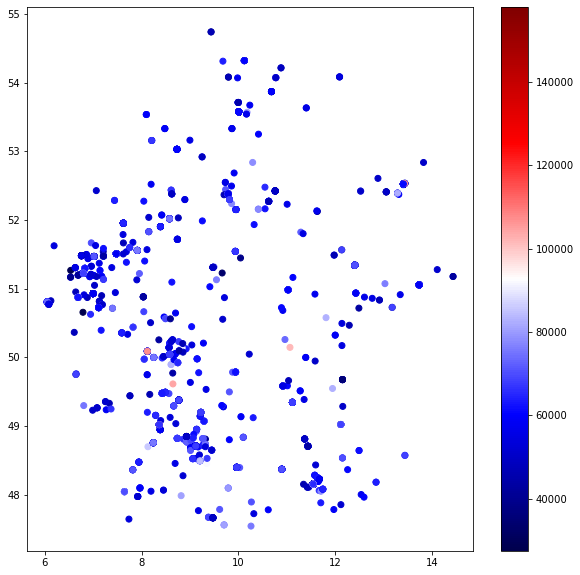

In [650]:
plt.figure(figsize=(10, 10))
plt.scatter(x=df_all["longitude"], y=df_all["latitude"], c=df_all["average_salary"], cmap="seismic")
plt.colorbar()

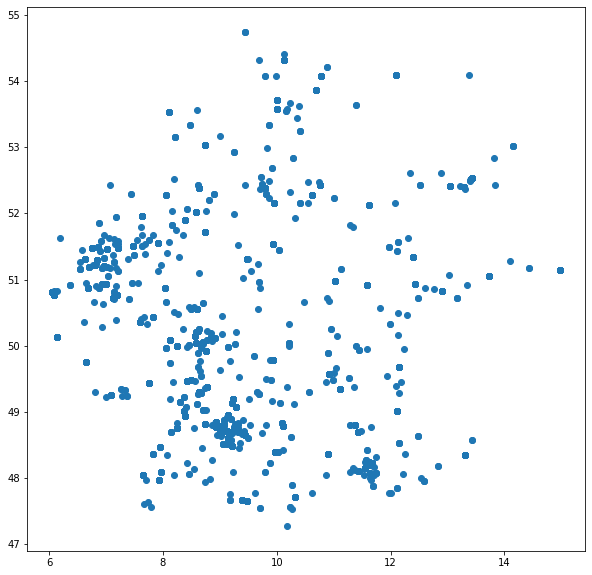

In [661]:
plt.figure(figsize=(10, 10))
plt.scatter(x=df_all["longitude"], y=df_all["latitude"])

In [664]:
df_all["city_salary"] = round(df_all.groupby("location_y")["average_salary"].transform("mean"))
df_all["city_count"] = df_all.groupby("location_y")["average_salary"].transform("count")
df_all["city_salary"].nunique()

207

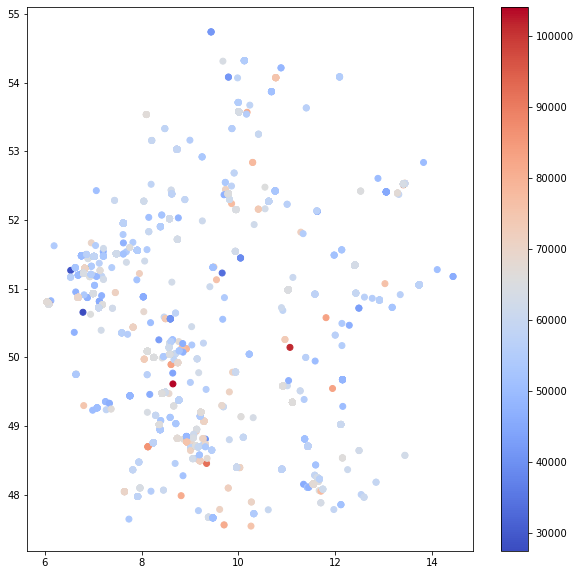

In [659]:
plt.figure(figsize=(10, 10))
plt.scatter(x=df_all["longitude"], y=df_all["latitude"], c=df_all["city_salary"], cmap="coolwarm")
plt.colorbar()

In [ ]:
# Karte von Deutschland mit Bundeländern bzw. Landkreisen im Hintergrund
# gleicher Plot mit Plotly testen
# Anzahl an Job in der Größe codieren
# Standorte auch ohne Gehälter analysieren

In [665]:
df_all.to_csv("data2/cleaned_long.csv", index=False)

# Evaluate Industry

In [84]:
df["industry"].value_counts()

IT & Internet                                                                      589
Unternehmensberatg., Wirtschaftsprüfg., Recht                                      304
Fahrzeugbau/-zulieferer                                                            278
Fahrzeugbau/-zulieferer|IT & Internet|Konsumgüter/Gebrauchsgüter                   219
Elektrotechnik, Feinmechanik & Optik                                               115
                                                                                  ... 
Agentur, Werbung, Marketing & PR|Telekommunikation                                   1
Elektrotechnik, Feinmechanik & Optik|Energie- und Wasserversorgung & Entsorgung      1
Konsumgüter/Gebrauchsgüter|IT & Internet                                             1
Fahrzeugbau/-zulieferer|Groß- & Einzelhandel                                         1
IT & Internet|Medien (Film, Funk, TV, Verlage)                                       1
Name: industry, Length: 158, dtype: int64

In [ ]:
# erhaltene Werte mit Gehaltreport vergleichen
# testen, ob Codierung mit dem Gehaltsreport eine Verbesserung bringt

# Evaluate Contract Type

In [18]:
df["contract_type"].value_counts()

Feste Anstellung                                                            3206
Befristeter Vertrag                                                          150
Studentenjobs, Werkstudent                                                   116
Praktikum                                                                     94
Berufseinstieg/Trainee                                                        47
Ausbildung, Studium                                                           43
Praktikum, Studentenjobs, Werkstudent                                         28
Bachelor-/Master-/Diplom-Arbeiten                                             22
Promotion/Habilitation                                                        13
Feste Anstellung, Berufseinstieg/Trainee                                       9
Bachelor-/Master-/Diplom-Arbeiten, Praktikum                                   5
Arbeitnehmerüberlassung                                                        4
Bachelor-/Master-/Diplom-Arb

In [19]:
contracts = df["contract_type"].str.replace(", ", ",").str.get_dummies(",")
contracts.sum().sort_values(ascending=False)

Feste Anstellung                     3218
Befristeter Vertrag                   150
Studentenjobs                         147
Werkstudent                           147
Praktikum                             128
Berufseinstieg/Trainee                 56
Ausbildung                             44
Studium                                44
Bachelor-/Master-/Diplom-Arbeiten      29
Promotion/Habilitation                 13
Arbeitnehmerüberlassung                 5
Freie Mitarbeit/Projektmitarbeit        1
dtype: int64

In [20]:
# wieviele Gehaltsangaben existieren für Jobs ohne Festanstellung?
# Studentenjobs und Werkstudent sind gleich
# Ausbildung und Studium sind gleich
# die einzelnen Kategorien sind nicht exklusiv

In [21]:
df.loc[(contracts["Feste Anstellung"] == 0)].shape

(543, 16)

In [22]:
df.loc[(contracts["Feste Anstellung"] == 0), "salary"].notnull().sum()

6

In [23]:
df.loc[(contracts["Feste Anstellung"] == 0) & (df["salary"].notnull())]

,link,company,title,location,contract_type,work_type,content,industry,rating,num_ratings,company_link,release_date,salary,company_size,title_cat,experience
110,https://www.stepstone.de/stellenangebote--Trai...,BARMER,Trainee Data Science/Analytics (m/w/d),Wuppertal,Berufseinstieg/Trainee,Vollzeit,"Finden Sie Ihren Grund, bei uns zu arbeiten.Tr...",Versicherungen,3.6,72 Bewertungen,https://www.stepstone.de/cmp/de/BARMER-100454/...,2022-06-01,61.000 - 83.000 €,"10,001+",Machine Learning Engineer,Mid-Level
2272,https://www.stepstone.de/stellenangebote--Proj...,TotalEnergies Marketing Deutschland GmbH,Projektmanager (m/w/d) innovative Digitalisier...,Berlin,Befristeter Vertrag,"Vollzeit, Home Office möglich","Engagieren Sie sich bei TotalEnergies, einem d...",Energie- und Wasserversorgung & Entsorgung,4.1,32 Bewertungen,https://www.stepstone.de/cmp/de/TotalEnergies-...,2022-05-24,47.000 - 52.000 €,NaN,Manager,Manager
4790,https://www.stepstone.de/stellenangebote--Proj...,Professional Scientists GmbH & Co. KG,Projektleiter Laser & Optik (m/w/d),Stuttgart,Arbeitnehmerüberlassung,Vollzeit,professional scientistsist für potentielle Bew...,Personaldienstleistungen,5.0,3 Bewertungen,https://www.stepstone.de/cmp/de/Professional-S...,2022-06-01,90.000 - 110.000 €,1-10,Manager,Manager
5511,https://www.stepstone.de/stellenangebote--Data...,DB Zeitarbeit GmbH,"Data Engineer, Business Analyst (w/m/d)",Frankfurt (Main),Arbeitnehmerüberlassung,Vollzeit,Karriere bei der Deutschen Bahn? Einstieg übe...,Personaldienstleistungen,4.2,143 Bewertungen,https://www.stepstone.de/cmp/de/DB-Zeitarbeit-...,2022-06-01,53.000 - 67.000 €,2501-5000,Data Engineer,Mid-Level
6822,https://www.stepstone.de/stellenangebote--Prax...,mindsquare AG,Praxisphase/Pflichtpraktikum im\nIT-Consulting,Bielefeld,Praktikum,Vollzeit,Als mindsquare haben wir uns auf die individue...,"Unternehmensberatg., Wirtschaftsprüfg., Recht|...",4.4,42 Bewertungen,https://www.stepstone.de/cmp/de/mindsquare-AG-...,2022-05-24,46.000 - 50.000 €,251-500,Data Science Consultant,Mid-Level
7207,https://www.stepstone.de/stellenangebote--Inte...,LS telcom AG,International Sales Trainee (m/w/d),Lichtenau,Berufseinstieg/Trainee,Vollzeit,Die LS telcom AG ist weltweit führender Anbiet...,Telekommunikation,NaN,NaN,NaN,2022-05-24,25.000 - 42.000 €,NaN,Machine Learning Engineer,Mid-Level


In [24]:
df.loc[(contracts["Feste Anstellung"] == 0), "contract_type"].value_counts()

Befristeter Vertrag                                                         150
Studentenjobs, Werkstudent                                                  116
Praktikum                                                                    94
Berufseinstieg/Trainee                                                       47
Ausbildung, Studium                                                          43
Praktikum, Studentenjobs, Werkstudent                                        28
Bachelor-/Master-/Diplom-Arbeiten                                            22
Promotion/Habilitation                                                       13
Bachelor-/Master-/Diplom-Arbeiten, Praktikum                                  5
Arbeitnehmerüberlassung                                                       4
Freie Mitarbeit/Projektmitarbeit                                              1
Bachelor-/Master-/Diplom-Arbeiten, Studentenjobs, Werkstudent                 1
Bachelor-/Master-/Diplom-Arbeiten, Prakt

In [25]:
# für Jobs ohne contract_type Festanstellung existieren lediglich 6 Gehaltsprognosen für 543 Jobs
# von daher macht es wenig Sinn in das spätere Modell auch andere Stelle außer mit Festanstellung miteinzubeziehen

# Evaluate Work Type

In [26]:
df["work_type"].value_counts()

Vollzeit                                   2076
Vollzeit, Home Office möglich              1142
Vollzeit, Teilzeit, Home Office möglich     214
Vollzeit, Teilzeit                          174
Teilzeit                                     98
Teilzeit, Home Office möglich                40
Vollzeit, Home Office mĂ¶glich                1
Name: work_type, dtype: int64

In [27]:
df["work_type"] = df["work_type"].str.replace("mĂ¶glich", "möglich")
df["work_type"].value_counts()

Vollzeit                                   2076
Vollzeit, Home Office möglich              1143
Vollzeit, Teilzeit, Home Office möglich     214
Vollzeit, Teilzeit                          174
Teilzeit                                     98
Teilzeit, Home Office möglich                40
Name: work_type, dtype: int64

In [28]:
df.groupby("work_type")["salary"].apply(lambda x: x.notnull().sum()).sort_values(ascending=False)

work_type
Vollzeit                                   1162
Vollzeit, Home Office möglich               761
Vollzeit, Teilzeit, Home Office möglich     122
Vollzeit, Teilzeit                           71
Teilzeit                                      2
Teilzeit, Home Office möglich                 0
Name: salary, dtype: int64

In [29]:
# für Teilzeit Jobs existieren kaum Gehaltsprognosen ==> nicht in das Modell mit einbeziehen
# wirkt sich Homeoffice auf Gehalt aus?
# ist Homeoffice abhängig vom Jobtyp, Unternehmen, Erfahrungslevel?

In [30]:
work_types = df["work_type"].str.replace(", ", ",").str.get_dummies(",")
work_types

,Home Office möglich,Teilzeit,Vollzeit
0,1,0,1
6,1,0,1
11,1,0,1
16,1,0,1
21,0,1,0
...,...,...,...
7895,0,0,1
7896,1,0,1
7897,0,0,1
7898,0,0,1


In [31]:
df.groupby(work_types["Teilzeit"])["salary"].apply(lambda x: x.notnull().sum() / len(x)).sort_values(ascending=False)

Teilzeit
0    0.594436
1    0.370722
Name: salary, dtype: float64

In [32]:
df.groupby(work_types["Home Office möglich"])["salary"].apply(lambda x: x.notnull().sum() / len(x)).sort_values(ascending=False)

Home Office möglich
1    0.632069
0    0.522420
Name: salary, dtype: float64

# Evaluate Salary

In [33]:
def convert_salary(x):
    x["min_salary"] = x["salary"].str.split(" ").str[0].str.replace(".", "", regex=False).astype("float")
    x["max_salary"] = x["salary"].str.split(" ").str[2].str.replace(".", "", regex=False).astype("float")
    x["average_salary"] = (x["min_salary"] + x["max_salary"]) / 2
    x.drop("salary", axis=1, inplace=True)
    return x

df = convert_salary(df)

<AxesSubplot:xlabel='average_salary'>

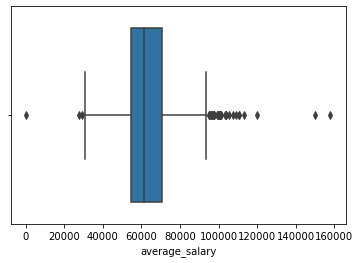

In [34]:
sns.boxplot(x=df["average_salary"])

In [35]:
# Ausreißer bei 0 muss auf jeden Fall entfernt werden
# zum Trainieren des Modelles kann es sinnvoll sein, andere Ausreißer ebenfalls zu entfernen (könnten Ergebnisse verzerren)

In [36]:
df.loc[df["average_salary"]<25000, ["min_salary", "max_salary", "average_salary"]] = np.nan

In [37]:
df.loc[df["average_salary"]>120000]

,link,company,title,location,contract_type,work_type,content,industry,rating,num_ratings,company_link,release_date,company_size,title_cat,experience,min_salary,max_salary,average_salary
3005,https://www.stepstone.de/stellenangebote--VP-G...,Evotec SE,VP Global Head Cellular Sciences (f/m/d),Hamburg,Feste Anstellung,Vollzeit,Evotec is a life science company with a uniqu...,Pharmaindustrie,3.6,5 Bewertungen,NaN,2022-06-03,NaN,Manager,Manager,142000.0,174000.0,158000.0
7054,https://www.stepstone.de/stellenangebote--Supp...,Elmar Hertzog und Partner Management Consultan...,Supply Chain Strategy Director (f/m/d),Berlin,Feste Anstellung,Vollzeit,Hertzog & Partner was founded in 1978 and sinc...,NaN,NaN,NaN,NaN,2022-06-01,NaN,Manager,Mid-Level,120000.0,180000.0,150000.0


In [38]:
titles_grouped = df.groupby("title_cat")["average_salary"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False)
with pd.option_context('display.precision', 0):
    print(titles_grouped)

                            mean    std  count
title_cat                                     
Manager                    67559  15614    537
Data Scientist             67069  10135    109
Machine Learning Engineer  65584  12272    142
Data Engineer              63921   8680    167
Software Engineer          60704   9777    284
Data Science Consultant    60636  10167    209
Others                     58564  13020    424
Data Analyst               57952   8468    243


<AxesSubplot:xlabel='title_cat', ylabel='mean'>

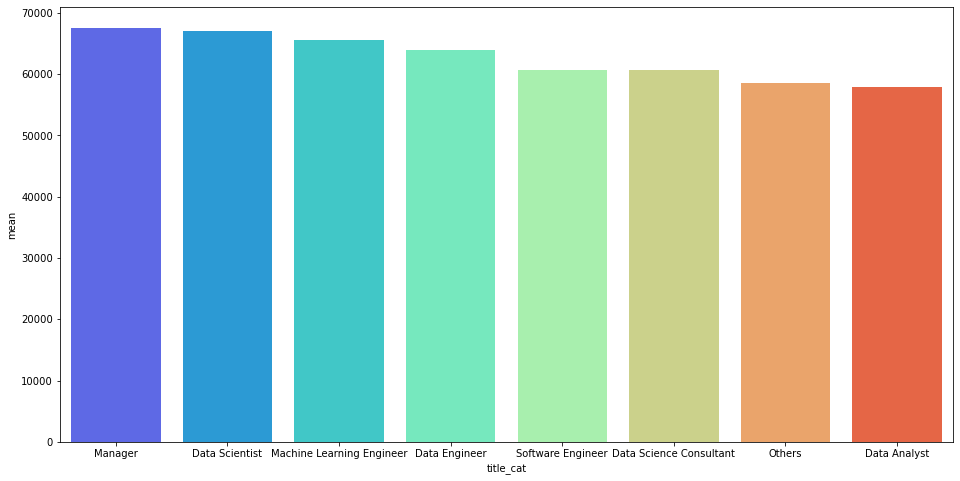

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(x=titles_grouped.index, y=titles_grouped["mean"], palette="rainbow")

<AxesSubplot:xlabel='title_cat', ylabel='average_salary'>

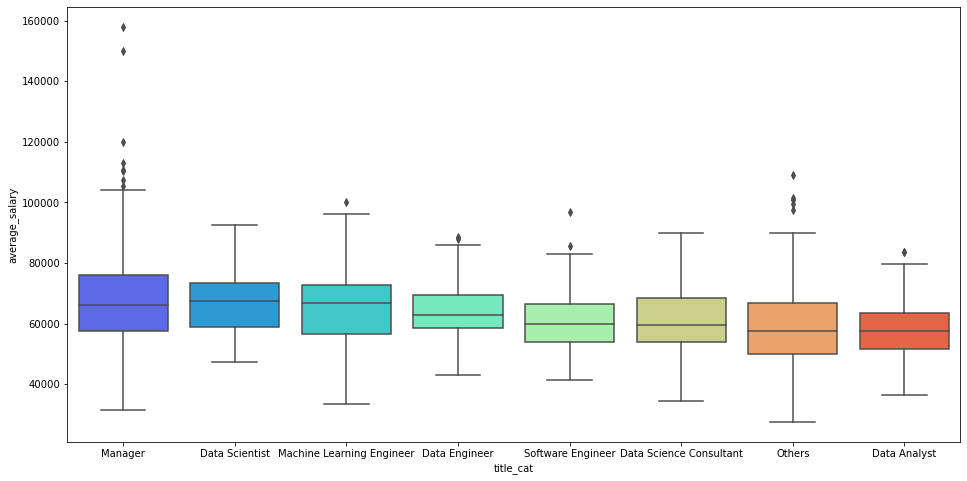

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x="title_cat", y="average_salary", order=titles_grouped.index, palette="rainbow")

In [42]:
# Verteilung der Gehälter entspricht dem, was man erwarten kann
# hohes Durchschnittsgehalt bei Data Scientists kann daran liegen, dass Research Scientist hier mit eingegliedert wurde
# Manager und Other unterliegen der größten Varianz, da hier eine Menge unterschiedlicher Bezeichnungen einfließen
# eventuell macht es Sinn für die Modellbildung die sehr hohen Managergehälter beim Training auszuschließen

<AxesSubplot:xlabel='title_cat', ylabel='average_salary'>

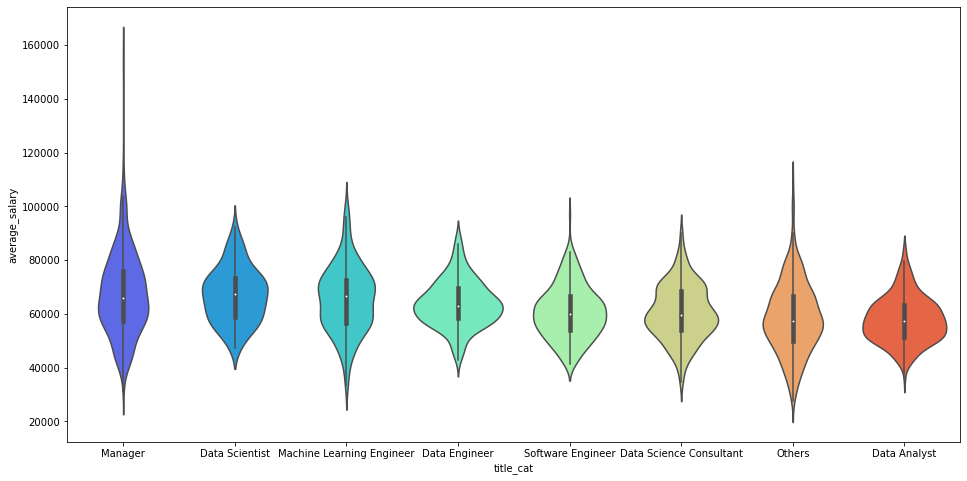

In [45]:
plt.figure(figsize=(16,8))
sns.violinplot(data=df, x="title_cat", y="average_salary", order=titles_grouped.index, palette="rainbow")

In [46]:
titles_grouped = df.groupby("experience")["average_salary"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False)
with pd.option_context('display.precision', 0):
    print(titles_grouped)

             mean    std  count
experience                     
Senior      67566  11044    270
Manager     67211  15096    527
Mid-Level   60310  11087   1244
Junior      50197   6200     74


In [47]:
df.loc[(df["title_cat"] == "Manager") & (df["average_salary"]<40000)]

,link,company,title,location,contract_type,work_type,content,industry,rating,num_ratings,company_link,release_date,company_size,title_cat,experience,min_salary,max_salary,average_salary
5882,https://www.stepstone.de/stellenangebote--Sach...,SWT-AöR,Sachbearbeiter:in Prozessmanagement (m/w/d),Trier,Feste Anstellung,Vollzeit,Für unsere Abteilung „Abrechnung/Marktprozesse...,NaN,NaN,NaN,NaN,2022-05-31,NaN,Manager,Manager,35000.0,44000.0,39500.0
6553,https://www.stepstone.de/stellenangebote--Cont...,STRATO Customer Service GmbH,Content Manager (m/w/d),Berlin,Feste Anstellung,Vollzeit,Einleitung Die STRATO Customer Service GmbH er...,NaN,NaN,NaN,NaN,2022-06-02,NaN,Manager,Manager,26000.0,41000.0,33500.0
7653,https://www.stepstone.de/stellenangebote--Supp...,Robert Half,Support Specialist / Teamassistenz (w/m/d) Bew...,Deutschland,Feste Anstellung,Vollzeit,Support Specialist / Teamassistenz (w/m/d) Bew...,Personaldienstleistungen,3.9,728 Bewertungen,https://www.stepstone.de/cmp/de/Robert-Half-38...,2022-05-31,1001-2500,Manager,Manager,29000.0,34000.0,31500.0
7654,https://www.stepstone.de/stellenangebote--Supp...,Robert Half,Support Specialist / Teamassistenz (w/m/d) Ver...,Hamburg,Feste Anstellung,Vollzeit,Support Specialist / Teamassistenz (w/m/d) Ver...,Personaldienstleistungen,3.9,728 Bewertungen,https://www.stepstone.de/cmp/de/Robert-Half-38...,2022-05-31,1001-2500,Manager,Manager,33000.0,37000.0,35000.0
7686,https://www.stepstone.de/stellenangebote--Assi...,Condo Group GmbH,Assistenz (m/w/d) der Standortleitung / Vertri...,Köln,Feste Anstellung,Vollzeit,CONDO ist ein voll-digitalisierter Real Estate...,NaN,NaN,NaN,NaN,2022-05-20,NaN,Manager,Manager,32000.0,47000.0,39500.0


In [48]:
# dass Manager im Schnitt nicht noch weiter vorne liegen, liegt daran, dass bei der obigen Zuordnung auch Assitenten des Managers
# nicht von diesem zu unterscheiden waren ==> treiben den Schnitt nach unten
# eine genauere Einteilung würde eine viele feinere Analyse erfordern, die sehr viel Zeit in Anspruch nehmen würde